# 지식 그래프의 기초: 트리플(Triple) 이해하기

트리플은 지식 그래프(Knowledge Graph)에서 정보를 표현하는 **가장 작은 단위**입니다. 일상적인 문장을 '주어-서술어-목적어' 구조로 구조화하여 데이터화한 것입니다.

### 트리플의 3대 구성 요소
| 요소 | 설명 | 예시 |
| :--- | :--- | :--- |
| **주어 (Subject)** | 정보를 설명하고자 하는 주인공 (Entity) | 세종대왕, 아이폰 |
| **서술어 (Predicate)** | 주어와 목적어를 잇는 관계나 속성 (Property) | 창제했다, 가격은 |
| **목적어 (Object)** | 서술어를 통해 연결되는 대상이나 값 (Value) | 한글, 1,000,000원 |

### 트리플 구조의 장점
1. **유연성**: 정해진 스키마(표) 없이도 새로운 관계(서술어)를 즉시 추가할 수 있습니다.
2. **연결성**: 데이터들이 꼬리에 꼬리를 물고 연결되어 거대한 그래프(Network)를 형성합니다.
3. **기계 판독성**: 컴퓨터가 문맥과 논리적 관계를 분석할 수 있는 표준 형식(RDF)을 제공합니다.

# [실습] 트리플 기초와 RDF 데이터 구축

예시 문장: **"20대 여성 사용자가 영화 '인셉션'에 4.5점을 주었다."**

이 복잡한 문장을 컴퓨터가 이해할 수 있도록 **이벤트 중심(Event-centric) 설계**를 적용하여 트리플로 분해합니다. 단순히 '사용자-영화'를 잇는 게 아니라, '평점 사건'이라는 별도의 노드를 만들어 정보의 확장성을 확보합니다.

### 1단계: 일상 언어를 '개체'로 분리하기
먼저 문장에서 우리가 정의할 '주인공'들을 추출합니다.
- 사용자 (User_01)
- 영화 (Movie_Inception)
- 평점 사건 (Rating_Event_01)

### 2단계: 문장을 트리플로 변환하기
1. 사용자 정보 (20대 여성)
먼저 사용자 개인의 속성을 트리플로 정의합니다.
- User_01 — rdf:type — Person (사용자는 사람이다)
- User_01 — hasGender — Female (성별은 여성이다)
- User_01 — hasAgeGroup — 20s (연령대는 20대다)

2. 영화 정보 (장르와 개봉연도)
영화의 상세 스펙을 정의합니다.
- Movie_Inception — rdf:type — Movie (대상은 영화다)
- Movie_Inception — hasTitle — "Inception" (제목은 인셉션이다)
- Movie_Inception — hasGenre — Sci-Fi (장르는 공상과학이다)
- Movie_Inception — releaseYear — 2010 (개봉연도는 2010년이다)

3. 평점 정보 (4.5점 부여 사건)
가장 중요한 '평점 이벤트'를 통해 사용자와 영화를 연결합니다.
- Rating_Event_01 — rdf:type — ReviewEvent (이것은 리뷰 사건이다)
- Rating_Event_01 — givenBy — User_01 (평점을 준 사람은 사용자 01이다)
- Rating_Event_01 — aboutMovie — Movie_Inception (대상 영화는 영화 인셉션이다)
- Rating_Event_01 — hasScore — 4.5 (점수는 4.5점이다)

# 1. 환경 설정 (Installation & Setup)
먼저 필요한 라이브러리를 설치하고 불러옵니다. 지식 그래프를 다루는 rdflib와 이를 시각적으로 확인하기 위한 networkx, matplotlib을 사용합니다.

In [1]:
# 1. 필요한 라이브러리 설치 (최초 1회 실행)
!pip install rdflib networkx matplotlib

from rdflib import Graph, Literal, RDF, URIRef, Namespace
import networkx as nx
import matplotlib.pyplot as plt

# 그래프 및 네임스페이스 설정
g = Graph()
EX = Namespace("http://example.org/")

Defaulting to user installation because normal site-packages is not writeable


# 2. 데이터 구축 (Triple Construction)
제시해주신 시나리오대로 사용자, 영화, 그리고 평점 이벤트 데이터를 생성합니다.

In [2]:
# 1. 사용자 정보 (20대 여성)
g.add((EX.User_01, RDF.type, EX.Person))
g.add((EX.User_01, EX.hasGender, EX.Female))
g.add((EX.User_01, EX.hasAgeGroup, Literal("20s")))

# 2. 영화 정보 (인셉션)
g.add((EX.Movie_Inception, RDF.type, EX.Movie))
g.add((EX.Movie_Inception, EX.hasTitle, Literal("Inception")))
g.add((EX.Movie_Inception, EX.hasGenre, EX.SciFi))
g.add((EX.Movie_Inception, EX.releaseYear, Literal(2010)))

# 3. 평점 정보 (중심축 노드 활용 연결)
g.add((EX.Rating_Event_01, RDF.type, EX.ReviewEvent))
g.add((EX.Rating_Event_01, EX.givenBy, EX.User_01))
g.add((EX.Rating_Event_01, EX.aboutMovie, EX.Movie_Inception))
g.add((EX.Rating_Event_01, EX.hasScore, Literal(4.5)))

print("트리플 구축 완료!")

트리플 구축 완료!


# 3. 결과 확인 (Turtle Format)
구축된 지식 그래프를 표준 포맷인 Turtle 형식으로 출력합니다.

In [3]:
# Turtle 형식으로 출력
print(g.serialize(format="turtle"))

@prefix ns1: <http://example.org/> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

ns1:Rating_Event_01 a ns1:ReviewEvent ;
    ns1:aboutMovie ns1:Movie_Inception ;
    ns1:givenBy ns1:User_01 ;
    ns1:hasScore 4.5e+00 .

ns1:Movie_Inception a ns1:Movie ;
    ns1:hasGenre ns1:SciFi ;
    ns1:hasTitle "Inception" ;
    ns1:releaseYear 2010 .

ns1:User_01 a ns1:Person ;
    ns1:hasAgeGroup "20s" ;
    ns1:hasGender ns1:Female .




# 4. 지식 그래프 시각화 (Visualization)
텍스트로만 보면 이해하기 어려운 '연결성'을 확인하기 위해 그래프 형태로 시각화해 봅니다.

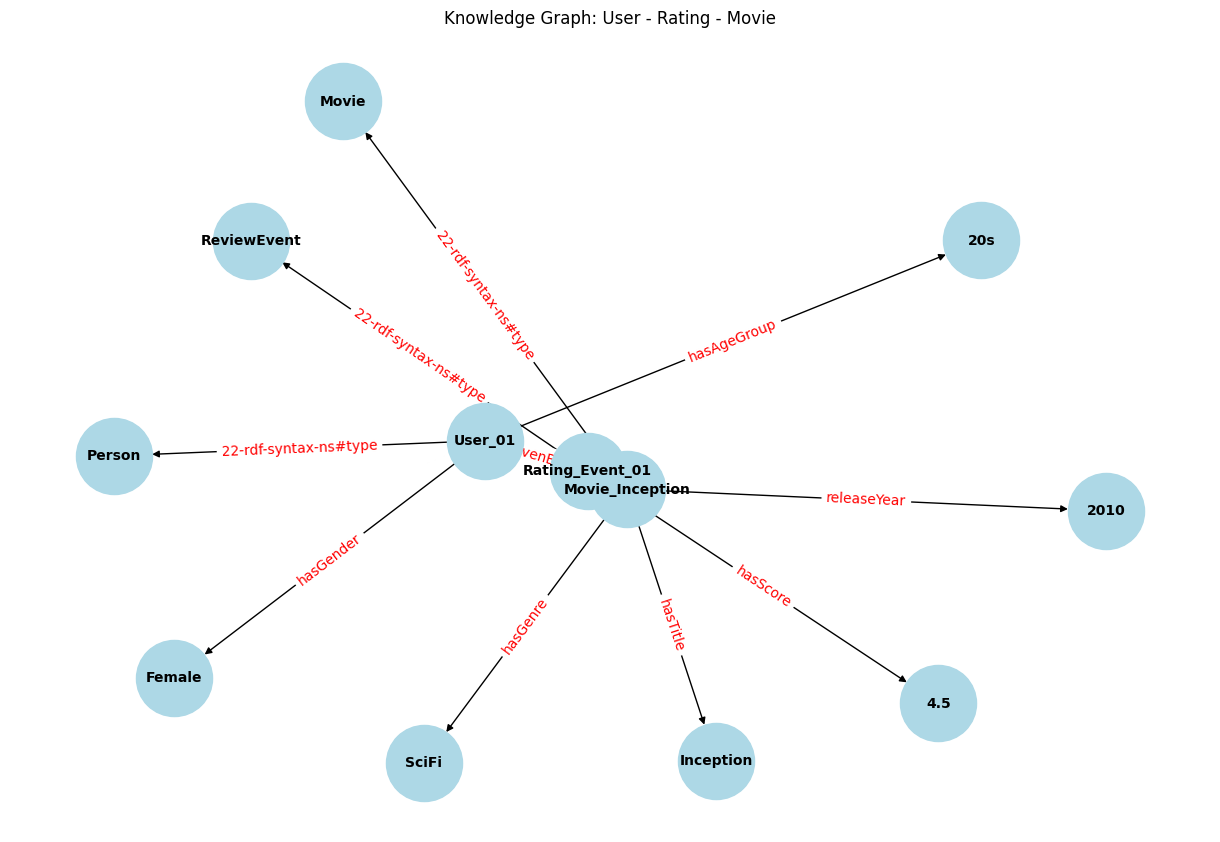

In [4]:
# 시각화를 위한 함수 정의
def visualize_graph(g):
    G = nx.DiGraph()
    for s, p, o in g:
        # URI 주소에서 이름만 추출하여 보기 좋게 변환
        s_label = s.split('/')[-1] if '/' in s else s.split('#')[-1]
        p_label = p.split('/')[-1] if '/' in p else p.split('#')[-1]
        o_label = o.split('/')[-1] if '/' in o else o.split('#')[-1]
        
        G.add_edge(s_label, o_label, label=p_label)

    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G, seed=42)
    
    # 노드와 엣지 그리기
    nx.draw(G, pos, with_labels=True, node_color='lightblue', 
            node_size=3000, font_size=10, font_weight='bold', arrows=True)
    
    # 엣지 라벨(서술어) 그리기
    edge_labels = nx.get_edge_attributes(G, 'label')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
    
    plt.title("Knowledge Graph: User - Rating - Movie")
    plt.show()

# 시각화 실행
visualize_graph(g)